In [1]:
import warnings
warnings.filterwarnings('ignore')  # Suppress notebook warnings

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:

# Fetch Diabetes dataset
diabetes_data = fetch_ucirepo(id=145)
X = diabetes_data.data.features
y = diabetes_data.data.targets

X

,age,sex,chest-pain,rest-bp,serum-chol,fasting-blood-sugar,electrocardiographic,max-heart-rate,angina,oldpeak,slope,major-vessels,thal
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


In [15]:
y

,heart-disease
0,2
1,1
2,2
3,1
4,1
...,...
265,1
266,1
267,1
268,1


In [18]:

# Verify data
print("Shape of X:", X.shape)  # (178, 13)
print("Shape of y:", y.shape)  # (178,)
print("Columns:", X.columns.tolist())
print("=="*20)
print("NaN counts:\n", X.isnull().sum())

Shape of X: (270, 13)
Shape of y: (270, 1)
Columns: ['age', 'sex', 'chest-pain', 'rest-bp', 'serum-chol', 'fasting-blood-sugar', 'electrocardiographic', 'max-heart-rate', 'angina', 'oldpeak', 'slope', 'major-vessels', 'thal']
NaN counts:
 age                     0
sex                     0
chest-pain              0
rest-bp                 0
serum-chol              0
fasting-blood-sugar     0
electrocardiographic    0
max-heart-rate          0
angina                  0
oldpeak                 0
slope                   0
major-vessels           0
thal                    0
dtype: int64


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   270 non-null    float64
 1   sex                   270 non-null    float64
 2   chest-pain            270 non-null    float64
 3   rest-bp               270 non-null    float64
 4   serum-chol            270 non-null    float64
 5   fasting-blood-sugar   270 non-null    float64
 6   electrocardiographic  270 non-null    float64
 7   max-heart-rate        270 non-null    float64
 8   angina                270 non-null    float64
 9   oldpeak               270 non-null    float64
 10  slope                 270 non-null    float64
 11  major-vessels         270 non-null    float64
 12  thal                  270 non-null    float64
dtypes: float64(13)
memory usage: 27.6 KB


In [28]:

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,age,sex,chest-pain,rest-bp,serum-chol,fasting-blood-sugar,electrocardiographic,max-heart-rate,angina,oldpeak,slope,major-vessels,thal
0,1.712094,0.689500,0.870928,-0.075410,1.402212,-0.417029,0.981664,-1.759208,-0.701222,1.181012,0.676419,2.472682,-0.875706
1,1.382140,-1.450327,-0.183559,-0.916759,6.093004,-0.417029,0.981664,0.446409,-0.701222,0.481153,0.676419,-0.711535,1.189277
2,0.282294,0.689500,-1.238045,-0.411950,0.219823,-0.417029,-1.026285,-0.375291,-0.701222,-0.656118,-0.954234,-0.711535,1.189277
3,1.052186,0.689500,0.870928,-0.187590,0.258589,-0.417029,-1.026285,-1.932198,1.426081,-0.743600,0.676419,0.349871,1.189277
4,2.152032,-1.450327,-1.238045,-0.636310,0.374890,-0.417029,0.981664,-1.240239,1.426081,-0.743600,-0.954234,0.349871,-0.875706
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,0.689500,-0.183559,2.280369,-0.981951,2.397916,-1.026285,0.532904,-0.701222,-0.481153,-0.954234,-0.711535,1.189277
266,-1.147506,0.689500,-1.238045,-0.636310,0.258589,-0.417029,-1.026285,1.008625,-0.701222,-0.918565,-0.954234,-0.711535,1.189277
267,0.172309,-1.450327,-1.238045,0.485490,0.859476,-0.417029,0.981664,0.143677,-0.701222,0.218706,0.676419,-0.711535,-0.875706
268,0.282294,0.689500,0.870928,0.485490,-1.117635,-0.417029,-1.026285,-0.072560,-0.701222,-0.568636,0.676419,-0.711535,0.673032


In [29]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape)  # (142, 13)
print("Test shape:", X_test.shape)   # (36, 13)

Train shape: (216, 13)
Test shape: (54, 13)


In [30]:

# Train k-NN (k=5 as default)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:

# Predict
y_pred = knn.predict(X_test)

In [32]:

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (k=5): {accuracy:.3f}")

Accuracy (k=5): 0.815


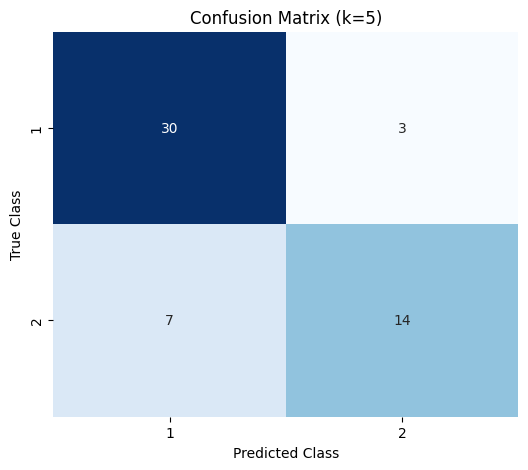

In [34]:

# --- Visualization 1: Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[1, 2], yticklabels=[1, 2])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix (k=5)')
plt.show()

In [35]:

# --- Visualization 2: Accuracy vs. k ---
k_values = range(1, 21)
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, knn.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, knn.predict(X_test)))

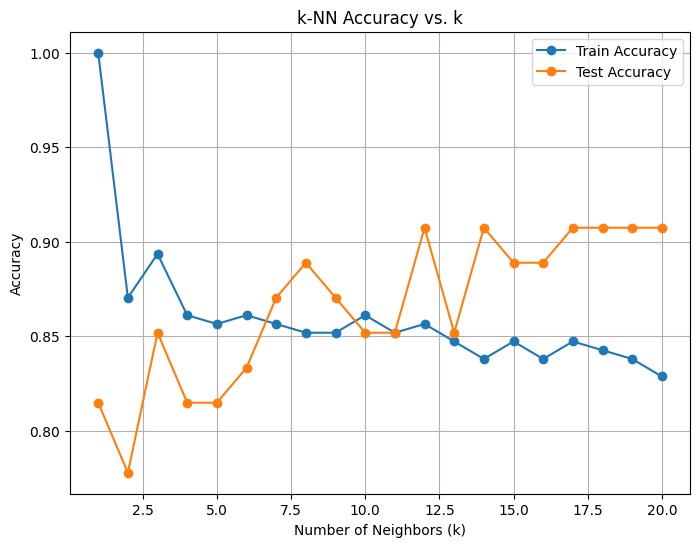

In [36]:

plt.figure(figsize=(8, 6))
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy vs. k')
plt.legend()
plt.grid(True)
plt.show()

In [37]:

# Optimal k
optimal_k = k_values[np.argmax(test_accuracies)]
print(f"Optimal k: {optimal_k}, Test Accuracy: {test_accuracies[optimal_k-1]:.3f}")

Optimal k: 12, Test Accuracy: 0.907
